<a href="https://colab.research.google.com/github/aritsarann/data-python-nd/blob/main/dads/ml/ML1_6610412001_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = 'https://raw.githubusercontent.com/aritsarann/data-python-nd/main/dads/data/Housing.csv'
df = pd.read_csv(data, sep = ',')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Data Exploration

Text(0, 0.5, 'Price (Y)')

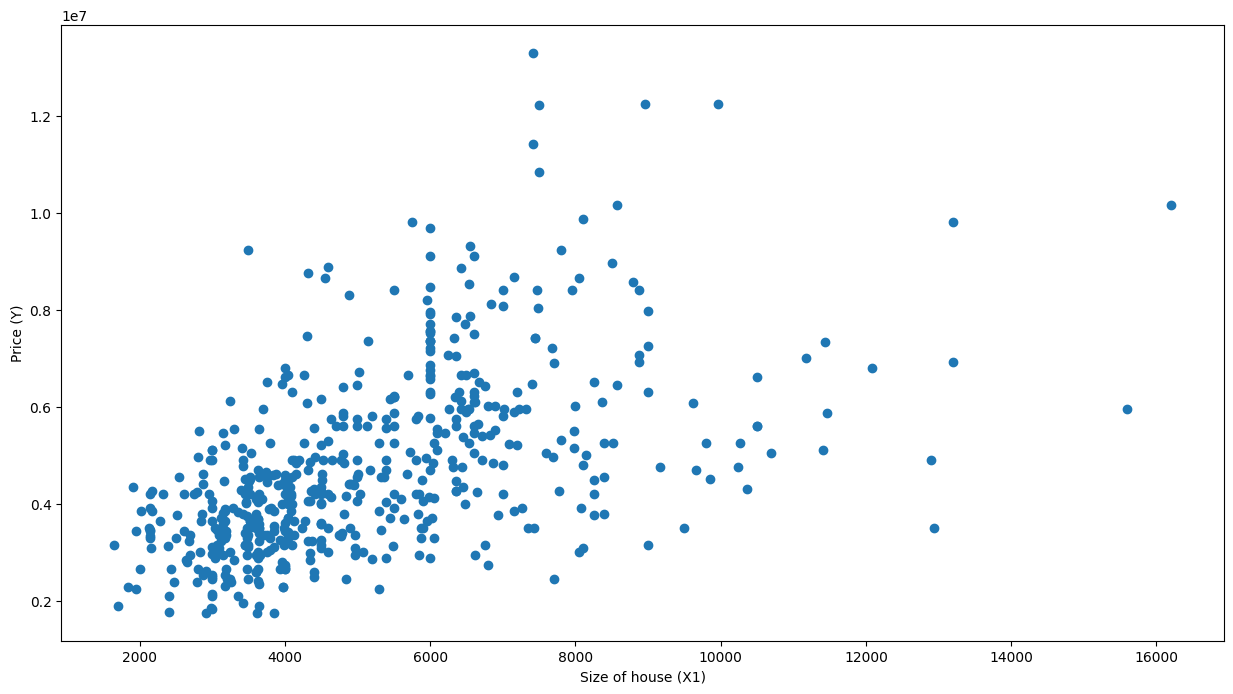

In [6]:
plt.figure(figsize = (15,8))
plt.scatter(df.iloc[:,1],df.price)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")

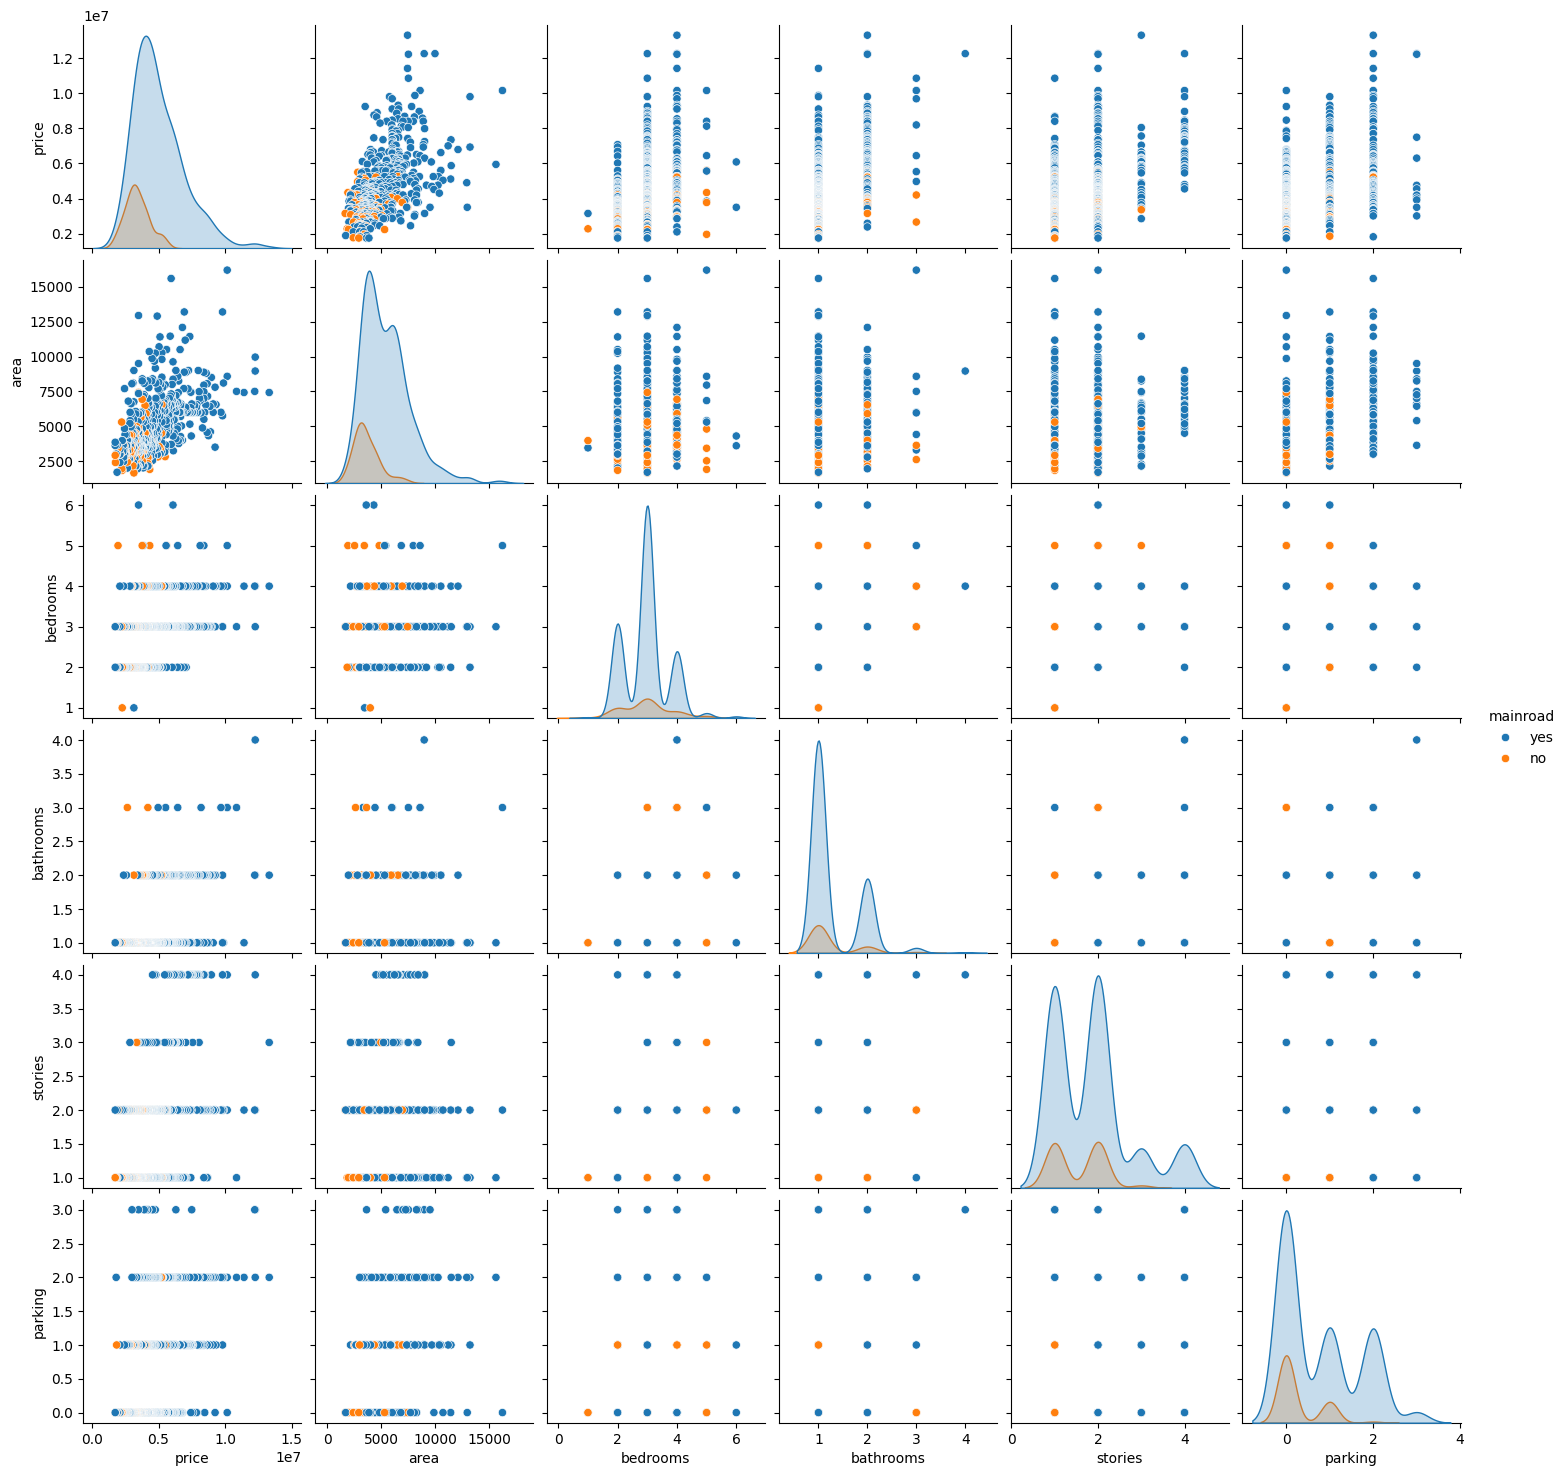

In [7]:
sns.pairplot(df, hue='mainroad')
plt.show()

<ipython-input-8-13e510af6f67>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


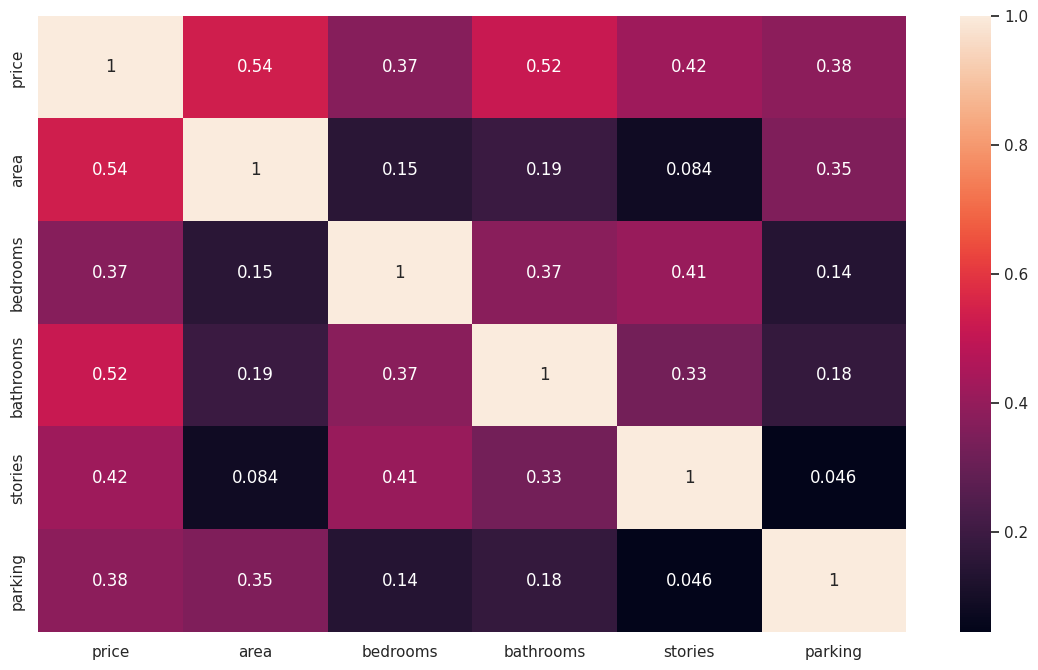

In [8]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True)

## Data Preprocessing

In [9]:
# Converting categorical variables to numeric
df = df.replace(['yes', 'no'], [1, 0])
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [10]:
X = df.drop('price',axis=1)
y = df["price"]

In [11]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 38)

## Model Train & Evaluation

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lin_reg.predict(X_test)
print(y_pred)

[7178098.46412574 8054674.72721281 4970205.13094707 4531526.14284385
 5769140.05518006 7714468.4482894  4087944.92871765 3750010.42127101
 3716083.16083507 7182573.71492152 5340478.68959322 6248526.03321119
 5155185.17876991 4257097.30146492 3656880.50775042 6235266.62833384
 4516327.46051886 6304687.1277914  6502847.04693007 3926135.96565836
 7322334.59777724 4101795.66551227 6445825.07171745 3412921.81514613
 8167220.03891232 3731574.75640882 4185586.13529814 7827202.03175734
 3917007.40819903 6473318.01887319 4760798.44901163 6565134.85009866
 4544799.01564169 3713493.53564168 5757750.82576426 5143599.11722158
 3758637.88126339 3705061.90680802 3449770.51325551 3692920.94475949
 5052180.0898905  5294860.30634006 5227371.86779318 3545072.27558576
 5706432.92831208 4412468.03196864 6787855.62345829 5988390.75903744
 3008453.66762941 3769702.70773663 6806332.73057573 2746505.11879322
 3501246.68821952 2617001.22445155 3676243.05956639 5510648.9183588
 3297627.35845982 4059626.83882036 

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 780548428355.1431
Mean Absolute Error (MAE): 684291.5505373483
R-squared (R2): 0.7483415153733874


In [14]:
# Download the saved model
import pickle
from google.colab import files

pickle.dump(lin_reg, open('ml_6610412001.sav', 'wb'))
files.download('ml_6610412001.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
# Make predictions using the loaded model
with open('ml_6610412001.sav', 'rb') as file:
    saved_model = pickle.load(file)

predictions = saved_model.predict(X_test)
r2 = r2_score(y_test, predictions)

print("R-squared (R2):", r2)

R-squared (R2): 0.7483415153733874
